In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential,Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam



In [0]:
from keras.datasets import mnist

In [0]:
(X_Train,_),(_,_)=mnist.load_data()

In [55]:
print(X_Train.shape)

(60000, 28, 28)


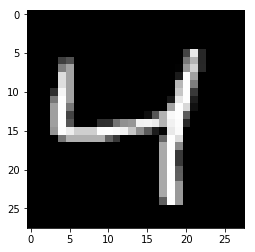

In [56]:
plt.imshow(X_Train[2],cmap='gray')
plt.show()

In [57]:
#normalising the data
X_train=(X_Train.astype('float32')-127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [58]:
X_train=X_train.reshape(-1,28*28)
print(X_train.shape)

(60000, 784)


In [0]:
EPOCHS=60
BATCH_SIZE=256
NO_OF_BATCHES=int(X_train.shape[0]/(BATCH_SIZE))
HALF_BATCH_SIZE=128
NOISE_DIM=100
adam=Adam(2e-4,beta_1=0.5)

In [0]:
def showImages(epoch):
  noise=np.random.normal(0,1,size=(100,NOISE_DIM))
  generated_images=generator.predict(noise)
  generated_images=generated_images.reshape(-1,28,28)
  plt.figure(figsize=(10,10))
  for i in range(100):
    #indexing start from 1 in subplot (i+1)
    plt.subplot(10,10,i+1)
    plt.imshow(generated_images[i],cmap='gray',interpolation='nearest')
    plt.axis("off")
  
  plt.show()
  plt.tight_layout()
  plt.savefig("images/gan_output_{0}.jpg".format(epoch))
    
  
  

In [61]:
#GENERATOR
#upscaling in generator
generator=Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 784)               803600    
Total para

In [63]:
#discriminator
#downscaling in discriminator
discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [64]:
##discriminator+generator-functional-API(step-2)
discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
generator_output=generator(gan_input)
gan_output=discriminator(generator_output)
#this step is joining our model functionally 
model=Model(input=gan_input,output=gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_9 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D Loss 259.2941 G loss 333.7925 


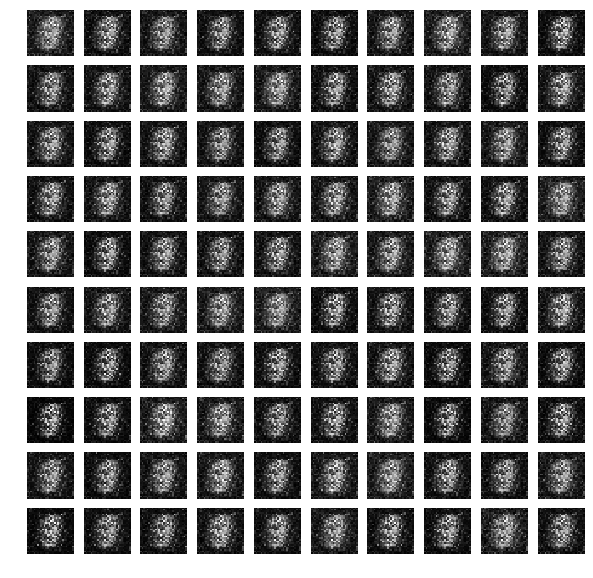

Epoch 2 D Loss 246.1190 G loss 246.2502 
Epoch 3 D Loss 230.8281 G loss 233.1298 
Epoch 4 D Loss 164.9379 G loss 234.7814 
Epoch 5 D Loss 168.6581 G loss 330.7373 
Epoch 6 D Loss 144.7771 G loss 246.9037 


<Figure size 432x288 with 0 Axes>

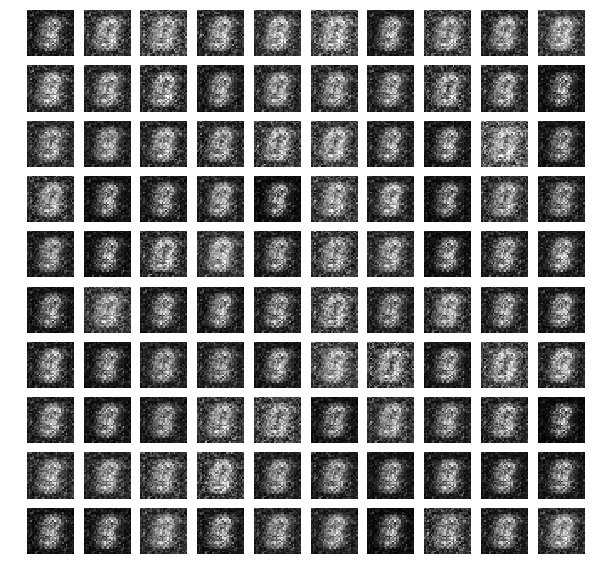

Epoch 7 D Loss 157.4495 G loss 320.8680 
Epoch 8 D Loss 148.1082 G loss 348.0617 
Epoch 9 D Loss 150.8981 G loss 338.2723 
Epoch 10 D Loss 163.0879 G loss 393.7631 
Epoch 11 D Loss 141.9757 G loss 357.7281 


<Figure size 432x288 with 0 Axes>

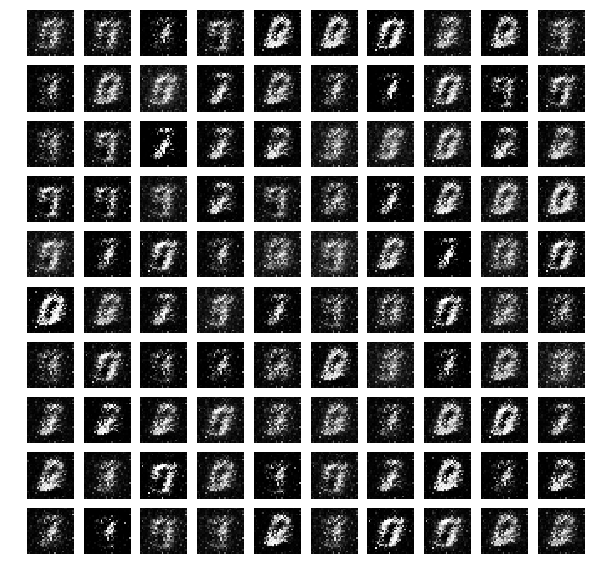

Epoch 12 D Loss 144.0554 G loss 344.2024 
Epoch 13 D Loss 141.4181 G loss 322.3548 
Epoch 14 D Loss 148.6023 G loss 298.2757 
Epoch 15 D Loss 154.7664 G loss 320.3841 
Epoch 16 D Loss 172.5877 G loss 336.4478 


<Figure size 432x288 with 0 Axes>

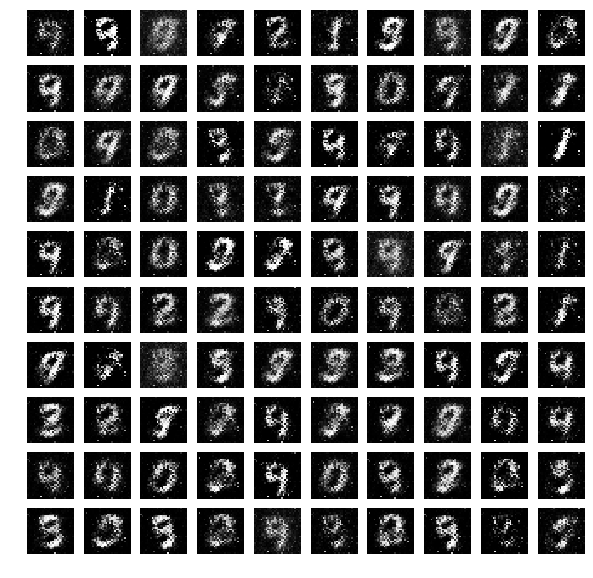

Epoch 17 D Loss 155.0423 G loss 363.4442 
Epoch 18 D Loss 132.8673 G loss 365.3739 
Epoch 19 D Loss 138.7752 G loss 365.4697 
Epoch 20 D Loss 135.1625 G loss 372.2982 
Epoch 21 D Loss 133.0915 G loss 386.0999 


<Figure size 432x288 with 0 Axes>

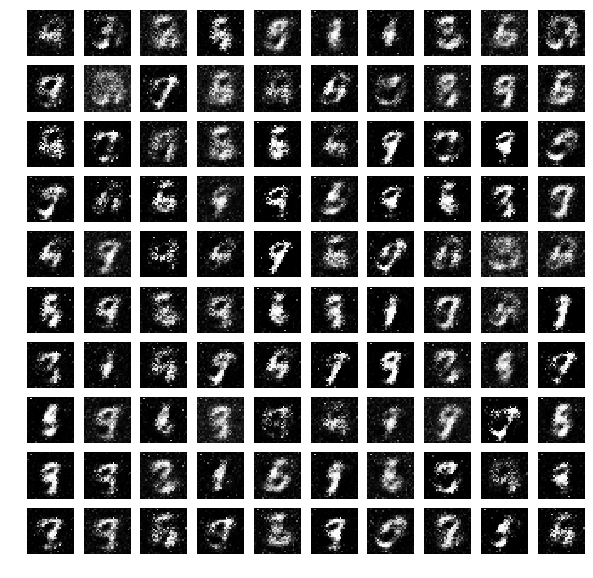

Epoch 22 D Loss 126.3993 G loss 413.2226 
Epoch 23 D Loss 129.7958 G loss 411.6656 
Epoch 24 D Loss 135.0746 G loss 371.0599 
Epoch 25 D Loss 131.0284 G loss 382.0966 
Epoch 26 D Loss 136.1377 G loss 404.8219 


<Figure size 432x288 with 0 Axes>

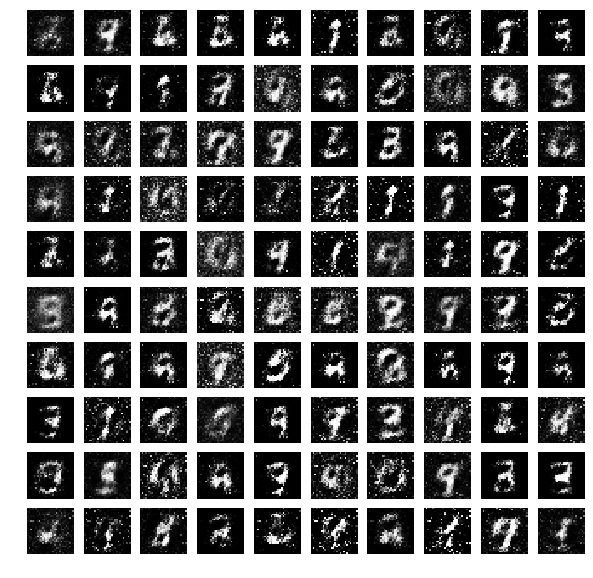

Epoch 27 D Loss 126.3430 G loss 394.2839 
Epoch 28 D Loss 132.2061 G loss 384.2750 
Epoch 29 D Loss 126.0367 G loss 378.2406 
Epoch 30 D Loss 137.4698 G loss 364.9167 
Epoch 31 D Loss 131.4839 G loss 347.7075 


<Figure size 432x288 with 0 Axes>

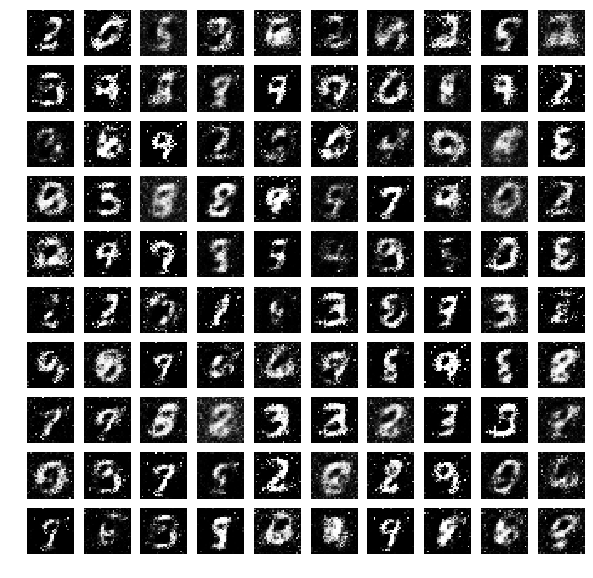

Epoch 32 D Loss 136.1365 G loss 342.6504 
Epoch 33 D Loss 131.5969 G loss 352.7559 
Epoch 34 D Loss 138.0487 G loss 352.6710 
Epoch 35 D Loss 133.5466 G loss 346.1572 
Epoch 36 D Loss 138.8943 G loss 320.5545 


<Figure size 432x288 with 0 Axes>

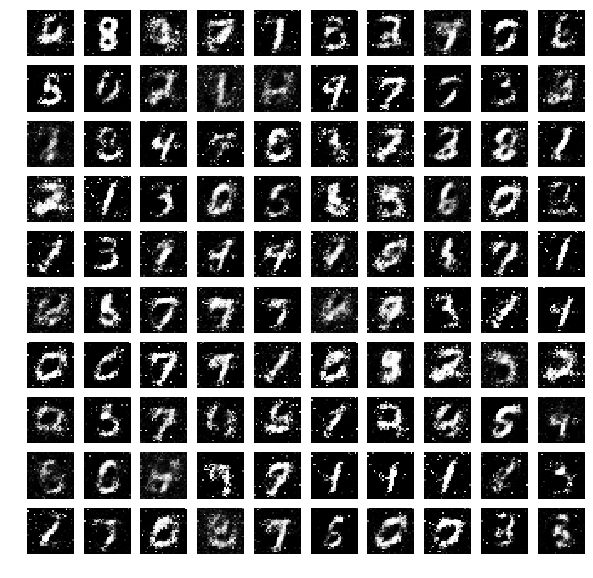

Epoch 37 D Loss 142.2582 G loss 308.3484 
Epoch 38 D Loss 141.3704 G loss 302.1031 
Epoch 39 D Loss 141.6039 G loss 302.8410 
Epoch 40 D Loss 143.9462 G loss 294.9927 
Epoch 41 D Loss 144.4415 G loss 288.4755 


<Figure size 432x288 with 0 Axes>

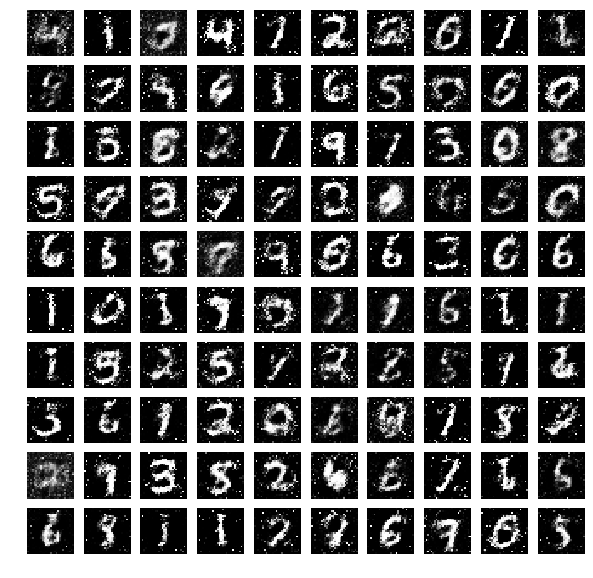

Epoch 42 D Loss 144.1410 G loss 284.1325 
Epoch 43 D Loss 147.7093 G loss 285.8750 
Epoch 44 D Loss 147.9689 G loss 270.3760 
Epoch 45 D Loss 149.1806 G loss 266.1974 
Epoch 46 D Loss 152.1884 G loss 259.6813 


<Figure size 432x288 with 0 Axes>

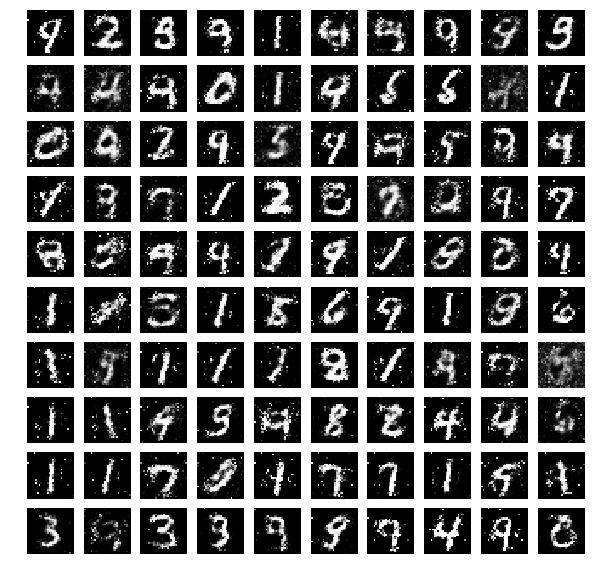

Epoch 47 D Loss 150.8460 G loss 259.2064 
Epoch 48 D Loss 153.1444 G loss 253.3283 
Epoch 49 D Loss 155.2245 G loss 249.7432 
Epoch 50 D Loss 154.4945 G loss 242.2049 
Epoch 51 D Loss 154.7232 G loss 243.3233 


<Figure size 432x288 with 0 Axes>

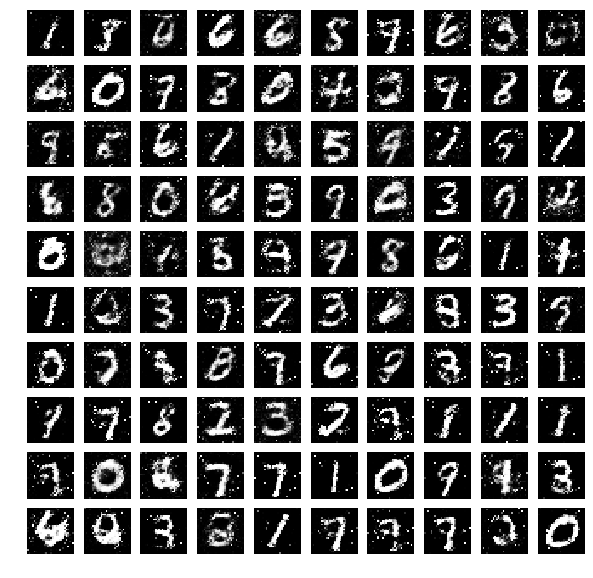

Epoch 52 D Loss 154.7109 G loss 248.0150 
Epoch 53 D Loss 155.8314 G loss 241.6110 
Epoch 54 D Loss 155.8511 G loss 237.1339 
Epoch 55 D Loss 157.7368 G loss 235.9342 
Epoch 56 D Loss 157.7660 G loss 234.9039 


<Figure size 432x288 with 0 Axes>

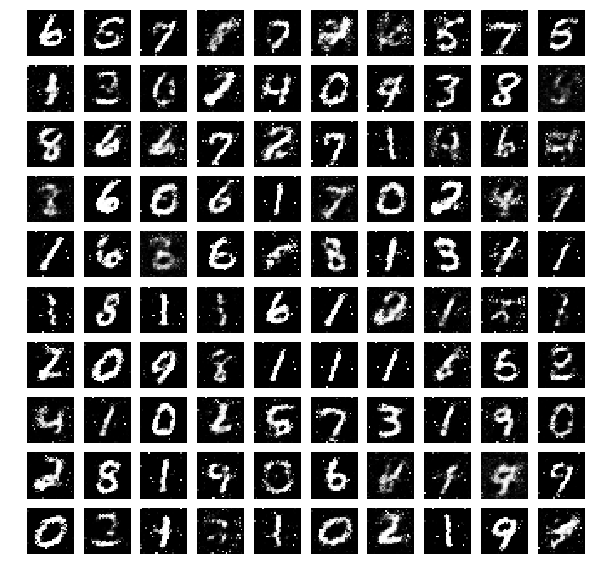

Epoch 57 D Loss 157.6959 G loss 232.8202 
Epoch 58 D Loss 159.1422 G loss 231.4810 
Epoch 59 D Loss 159.5022 G loss 227.9231 
Epoch 60 D Loss 158.3692 G loss 228.2202 


<Figure size 432x288 with 0 Axes>

In [65]:
for epoch in range(EPOCHS):
  epoch_g_loss=0
  epoch_d_loss=0
  for step in range(NO_OF_BATCHES):
    ##generating real images
    idx=np.random.randint(1,X_train.shape[0],HALF_BATCH_SIZE)
    real_imgs=X_train[idx]
    ##generating fake images assuming generator is frozen
    noise=np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
    fake_imgs=generator.predict(noise)
    ##labels
    real_y=np.ones((HALF_BATCH_SIZE,1))*0.9
    fake_y=np.zeros((HALF_BATCH_SIZE,1))
    ##training on discriminator
    d_real_loss=discriminator.train_on_batch(real_imgs,real_y)
    d_fake_loss=discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_real_loss+0.5*d_fake_loss
    epoch_d_loss+=d_loss
    ##training on generator
    noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    real_y = np.ones((BATCH_SIZE,1))
    ##why we consider model in this not generator
    g_loss=model.train_on_batch(noise,real_y)
    epoch_g_loss+=g_loss
  print("Epoch %d D Loss %.4f G loss %0.4f "%((epoch+1),epoch_d_loss,epoch_g_loss)) 
  if(epoch%5==0):
    #after every 5 epochs we are saving our model weights
    generator.save("model/gen_{0}.h5".format(epoch))
    showImages(epoch)               

In [44]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [45]:
!mkdir model

mkdir: cannot create directory ‘model’: File exists


In [46]:
!ls

images	model  sample_data


In [73]:

!zip -r images.zip /content/images

updating: content/images/ (stored 0%)
updating: content/images/gan_output_50.png (deflated 83%)
updating: content/images/gan_output_30.png (deflated 83%)
updating: content/images/gan_output_35.png (deflated 83%)
updating: content/images/gan_output_45.png (deflated 83%)
updating: content/images/gan_output_5.png (deflated 83%)
updating: content/images/gan_output_10.png (deflated 83%)
updating: content/images/gan_output_0.png (deflated 83%)
updating: content/images/gan_output_55.png (deflated 83%)
updating: content/images/gan_output_15.png (deflated 83%)
updating: content/images/gan_output_20.png (deflated 83%)
updating: content/images/gan_output_25.png (deflated 83%)
updating: content/images/gan_output_40.png (deflated 83%)


In [0]:
from google.colab import files
files.download('images.zip')